In [5]:
import numpy as np
import derpy
from time import sleep
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from tqdm import tqdm
from scipy.optimize import minimize

from katsu.mueller import(
    linear_retarder,
    linear_polarizer
)

In [6]:
cam = derpy.CRED2(set_temperature=-41, fps=10, tint=50, temp_tolerance=1) # TODO: add units to docstring (also add docstring)

Updating...
Sensor Temperature: -42.48C
Motherboard Temperature: 44.75C
Frontend Temperature: 49.0C
Powerboard Temperature: 54.75C
Peltier Temperature: 21.5C
Heatsink Temperature: 51.94C
***********************
Sensor Temperature: -42.48C
Motherboard Temperature: 44.75C
Frontend Temperature: 49.0C
Powerboard Temperature: 54.75C
Peltier Temperature: 21.5C
Heatsink Temperature: 51.94C
***********************
Sensor Temperature: -42.48C
Motherboard Temperature: 44.75C
Frontend Temperature: 49.0C
Powerboard Temperature: 54.75C
Peltier Temperature: 21.5C
Heatsink Temperature: 51.94C
***********************
Sensor Temperature: -42.56C
Motherboard Temperature: 44.75C
Frontend Temperature: 49.25C
Powerboard Temperature: 54.75C
Peltier Temperature: 21.19C
Heatsink Temperature: 52.16C
***********************
Sensor Temperature: -41.85C
Motherboard Temperature: 44.75C
Frontend Temperature: 49.0C
Powerboard Temperature: 54.5C
Peltier Temperature: 21.24C
Heatsink Temperature: 52.11C
***************

In [35]:
cam.close()

# Take a Dark

In [7]:
from pathlib import Path
from astropy.io import fits

def save_fits(data, pth, tint=50, fps=10, temp=-40, wavelength=0, overwrite=False):

    hdu = fits.PrimaryHDU(data)

    # set up fits headers
    hdu.header['TINT'] = tint
    hdu.header['FPS'] = fps
    hdu.header['SET TEMP'] = temp
    hdu.header['WVL'] = wavelength

    hdu.writeto(pth, overwrite=overwrite)

N_IMS = 100
dark = cam.take_median_image(N_IMS)


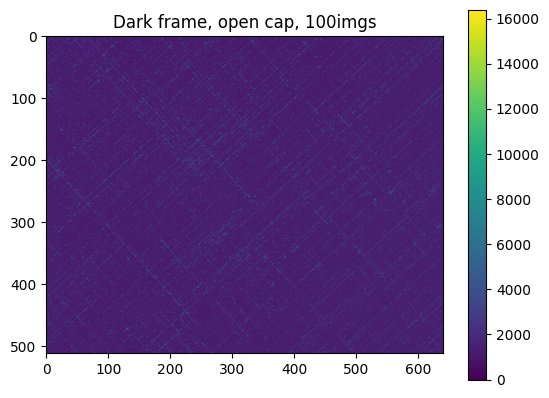

In [8]:
plt.title(f"Dark frame, open cap, {N_IMS}imgs")
plt.imshow(dark, vmax=2**14)
plt.colorbar()

In [ ]:
from numpy.fft import fft2, fftshift


array([[4.2841e+04, 1.0000e+00, 0.0000e+00, ..., 1.2260e+03, 1.3030e+03,
        1.5810e+03],
       [1.3350e+03, 1.3820e+03, 1.2750e+03, ..., 1.2090e+03, 3.4720e+03,
        2.4980e+03],
       [1.3560e+03, 1.2320e+03, 1.3140e+03, ..., 4.1500e+03, 1.2500e+03,
        1.4530e+03],
       ...,
       [1.4630e+03, 1.3350e+03, 1.3900e+03, ..., 1.3320e+03, 1.3320e+03,
        1.4060e+03],
       [1.4630e+03, 1.2290e+03, 1.2850e+03, ..., 1.3010e+03, 1.2550e+03,
        1.2550e+03],
       [1.5230e+03, 1.3530e+03, 1.3560e+03, ..., 1.3610e+03, 1.3600e+03,
        1.6610e+03]], shape=(512, 640))

# Take a Bright

In [33]:
# im_stack = cam.take_many_images(N_IMS)
im_stack_dark_subtract = [i - 1.015*dark for i in im_stack]
im_median = np.median(im_stack_dark_subtract, axis=0)

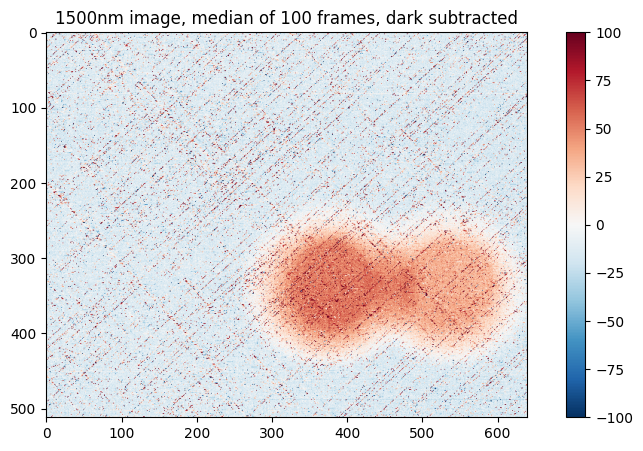

In [34]:
WVL = 1500
DATA_DIR = Path.home() / "Desktop/derp_data/brightness_control"

plt.figure(figsize=[10,5])
plt.title(f"{WVL}nm image, median of {N_IMS} frames, dark subtracted")
vlim = 100
plt.imshow(im_median, vmax=vlim, vmin=-vlim, cmap="RdBu_r")
plt.colorbar()
plt.show()

# three wavelengths, 20nm
# save_fits(im_median, pth=DATA_DIR / f"{WVL}_no_qwp_nm", wavelength=WVL)

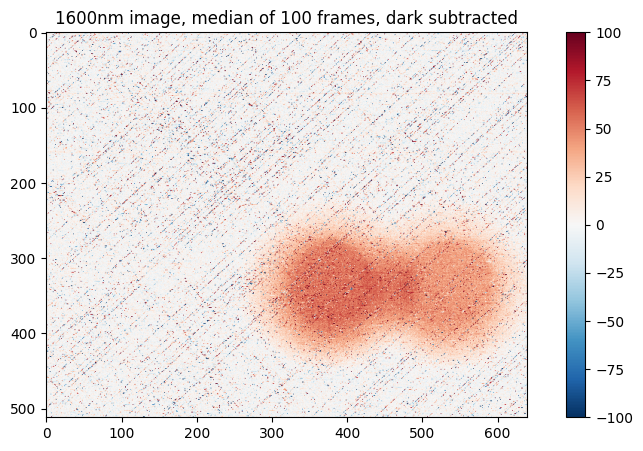

OSError: File C:\Users\Brewster\Desktop\derp_data\brightness_control\1600_no_qwp_nm already exists. If you mean to replace it then use the argument "overwrite=True".

In [16]:
WVL = 1600
DATA_DIR = Path.home() / "Desktop/derp_data/brightness_control"

plt.figure(figsize=[10,5])
plt.title(f"{WVL}nm image, median of {N_IMS} frames, dark subtracted")
vlim = 100
plt.imshow(im_median, vmax=vlim, vmin=-vlim, cmap="RdBu_r")
plt.colorbar()
plt.show()

# three wavelengths, 20nm
save_fits(im_median, pth=DATA_DIR / f"{WVL}_no_qwp_nm", wavelength=WVL)

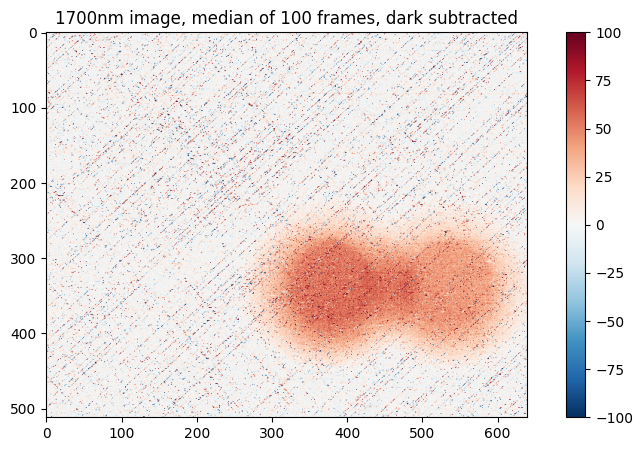

In [17]:
WVL = 1700
DATA_DIR = Path.home() / "Desktop/derp_data/brightness_control"

plt.figure(figsize=[10,5])
plt.title(f"{WVL}nm image, median of {N_IMS} frames, dark subtracted")
vlim = 100
plt.imshow(im_median, vmax=vlim, vmin=-vlim, cmap="RdBu_r")
plt.colorbar()
plt.show()

# three wavelengths, 20nm
save_fits(im_median, pth=DATA_DIR / f"{WVL}_no_qwp_nm", wavelength=WVL)

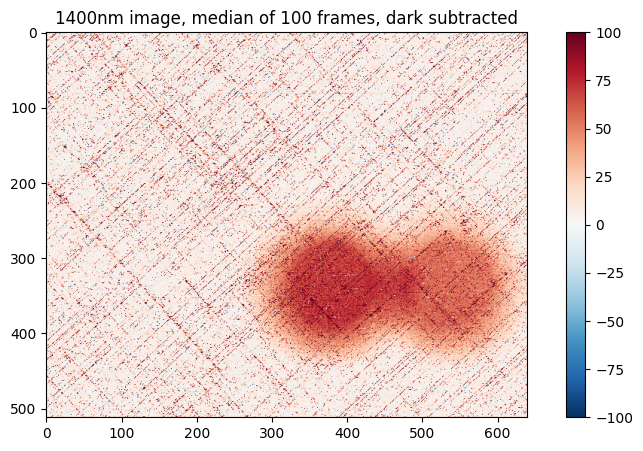

In [19]:
WVL = 1400
DATA_DIR = Path.home() / "Desktop/derp_data/brightness_control"

plt.figure(figsize=[10,5])
plt.title(f"{WVL}nm image, median of {N_IMS} frames, dark subtracted")
vlim = 100
plt.imshow(im_median, vmax=vlim, vmin=-vlim, cmap="RdBu_r")
plt.colorbar()
plt.show()

# three wavelengths, 20nm
save_fits(im_median, pth=DATA_DIR / f"{WVL}_no_qwp_nm", wavelength=WVL)

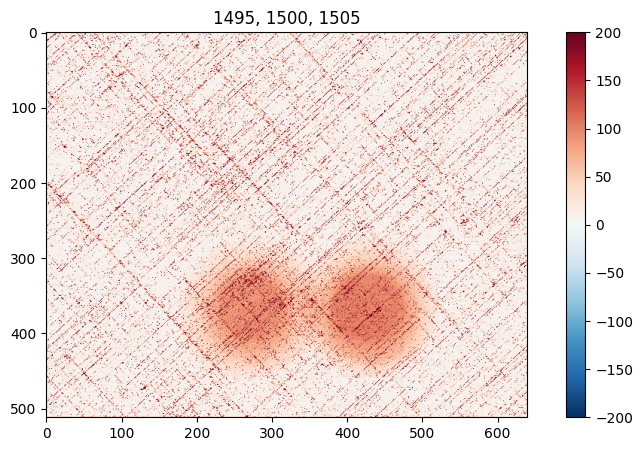

In [39]:
plt.figure(figsize=[10,5])
plt.title(f"1495, 1500, 1505")
vlim = 200
plt.imshow(im_median, vmax=vlim, vmin=-vlim, cmap="RdBu_r")
plt.colorbar()
plt.show()

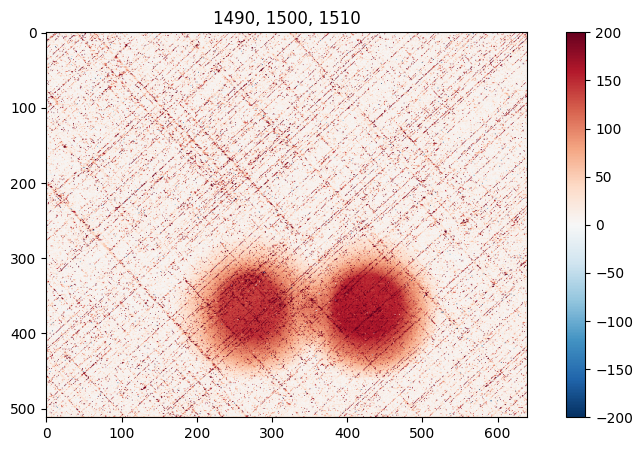

In [35]:
plt.figure(figsize=[10,5])
plt.title(f"1490, 1500, 1510")
vlim = 200
plt.imshow(im_median, vmax=vlim, vmin=-vlim, cmap="RdBu_r")
plt.colorbar()
plt.show()

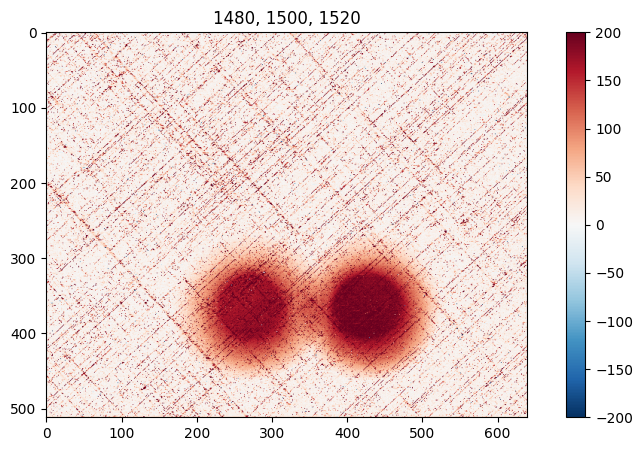

In [37]:
plt.figure(figsize=[10,5])
plt.title(f"1480, 1500, 1520")
vlim = 200
plt.imshow(im_median, vmax=vlim, vmin=-vlim, cmap="RdBu_r")
plt.colorbar()
plt.show()

In [ ]:
wvl = 1500
bw = 0.05
# Looks like diminishing returns after a 5% bw
print(wvl * np.linspace(1-bw/2, 1+bw/2, 3))

[1462.5 1500.  1537.5]


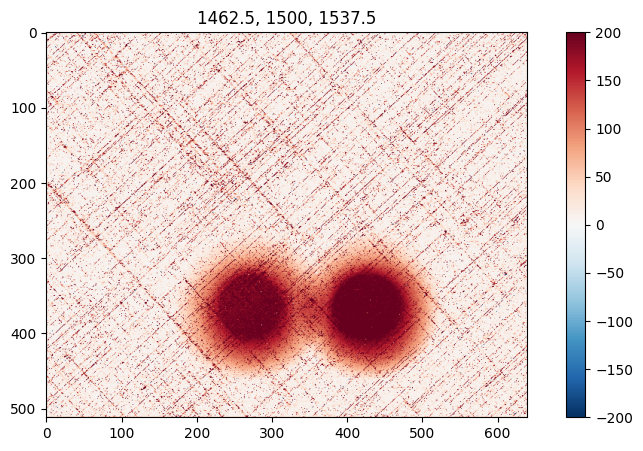

In [44]:
plt.figure(figsize=[10,5])
plt.title(f"1462.5, 1500, 1537.5")
vlim = 200
plt.imshow(im_median, vmax=vlim, vmin=-vlim, cmap="RdBu_r")
plt.colorbar()
plt.show()

In [43]:
wvl = 1500
bw = 0.10
print(wvl * np.linspace(1-bw/2, 1+bw/2, 3))

[1425. 1500. 1575.]


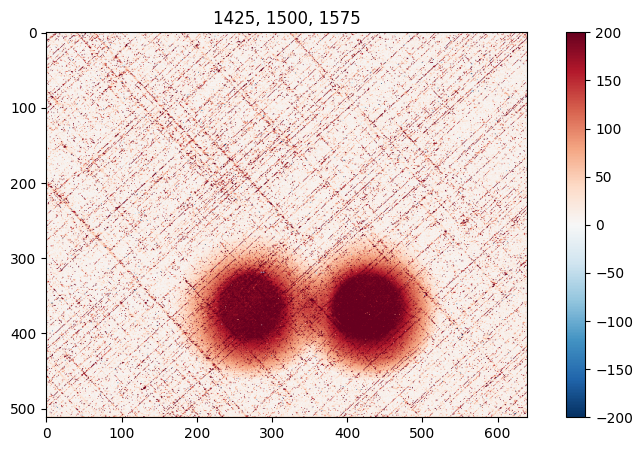

In [46]:
plt.figure(figsize=[10,5])
plt.title(f"1425, 1500, 1575")
vlim = 200
plt.imshow(im_median, vmax=vlim, vmin=-vlim, cmap="RdBu_r")
plt.colorbar()
plt.show()

In [4]:
cam.close()